In [1]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild018.tif')
blur = cv2.blur(img,(15,15))
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu

from skimage.morphology import skeletonize
otsuskeleton = skeletonize(otsublur)
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(otsuskeleton, cmap=red2, interpolation='sinc', alpha=.42) 

/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (693, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))
/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


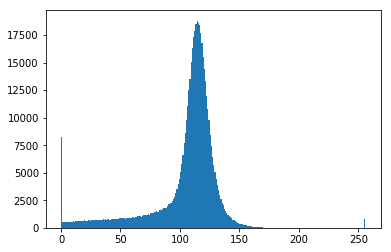

103.92325107842349

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild018.tif',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

np.mean(img)

In [3]:
np.std(img)

29.990807116897606

In [4]:
from PIL import Image
im = Image.open("cropped_Wild018.tif")

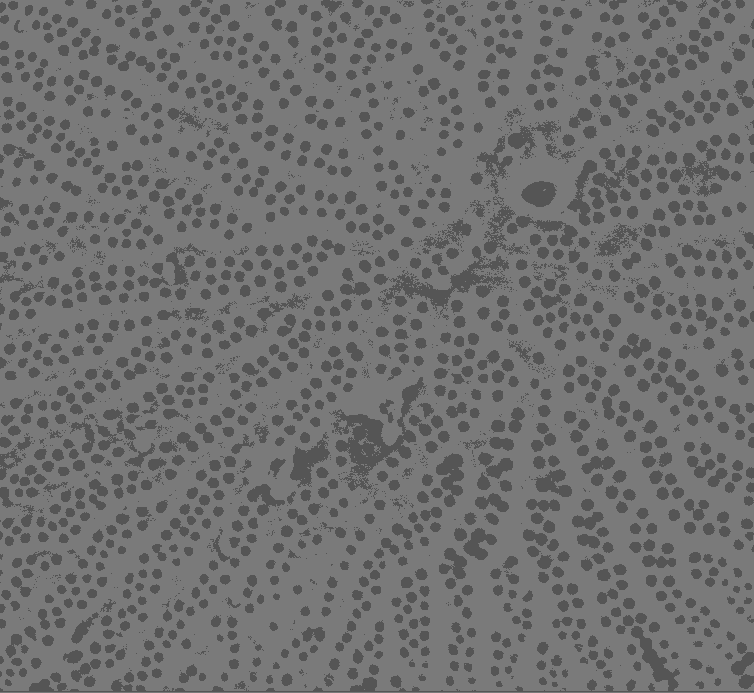

In [173]:
im.quantize(2,0)

In [174]:
im.quantize(2,0)
lum_img = img[:,:]

In [175]:
image=im.quantize(2,0)
image.save('simple_Wild018.tif')

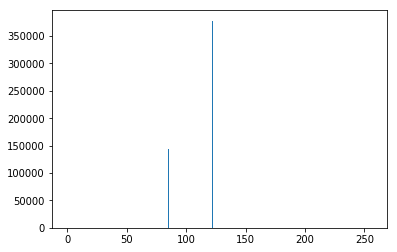

[[122 122 122 ... 122 122 122]
 [122 122 122 ... 122 122 122]
 [122  85  85 ... 122 122 122]
 ...
 [ 85  85  85 ... 122 122 122]
 [ 85  85  85 ...  85  85  85]
 [122 122 122 ... 122 122 122]]


In [188]:
newimg = cv.imread('simple_Wild018.tif',0)
plt.hist(newimg.ravel(),256,[0,256]); plt.show()
print(newimg)

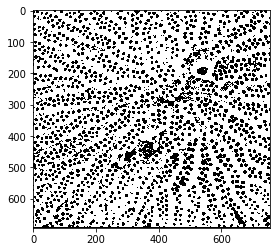

In [189]:
newimg[np.where(newimg == [0])] = [255]
plt.imshow(newimg, cmap='gray')

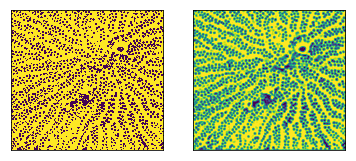

(693, 754)

In [190]:
blur = cv2.blur(newimg,(9, 9))
plt.subplot(121),plt.imshow(newimg)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur)
plt.xticks([]), plt.yticks([])
plt.show()
np.shape(blur)

In [193]:
#blurred
from skimage.filters import threshold_otsu
blurth=threshold_otsu(blur)
print(blurth)

#notblurred
from skimage.filters import threshold_otsu
th=threshold_otsu(newimg)
print(th)
np.shape(newimg)

109
85


(693, 754)

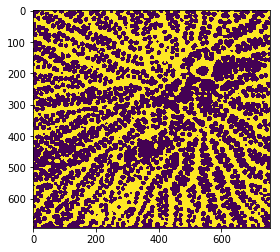

In [202]:
#Blurred
blur_threshold = blur[:,:] > 116
plt.imshow(blur_threshold)

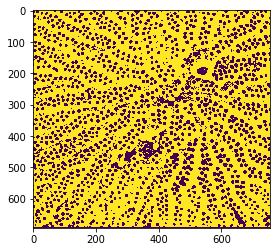

In [203]:
threshold = newimg[:,:] > blurth
plt.imshow(threshold)

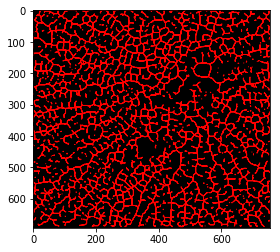

In [204]:
#blurred
from skimage.morphology import skeletonize
blurskeleton = skeletonize(blur_threshold)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(blurskeleton, cmap=red2, interpolation= 'bilinear')

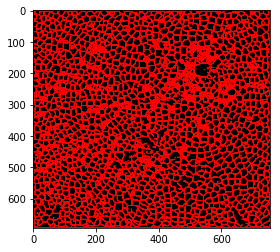

In [205]:
#not blurred
skeleton = skeletonize(threshold)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


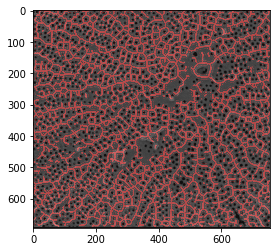

In [206]:
import matplotlib.image as mpimg
img=mpimg.imread('cropped_Wild018.tif')
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(blurskeleton, cmap=red2, interpolation='sinc', alpha=.42) 
plt.show()